In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Tension_data_set_2024.csv')

In [4]:
df.head()

,BP,BH,B2D,DH,T,D2H,T_level
0,14,0,35,5.5,31.50,22,M
1,19,0,35,5.5,26.96,17,M
2,16,0,36,5.5,33.13,19,H
3,17,0,36,5.5,33.13,18,H
4,17,0,36,5.5,33.90,18,H


# Unsupervised learning

In [222]:
from sklearn.cluster import KMeans

In [223]:
data= df.drop('T_level', axis=1)

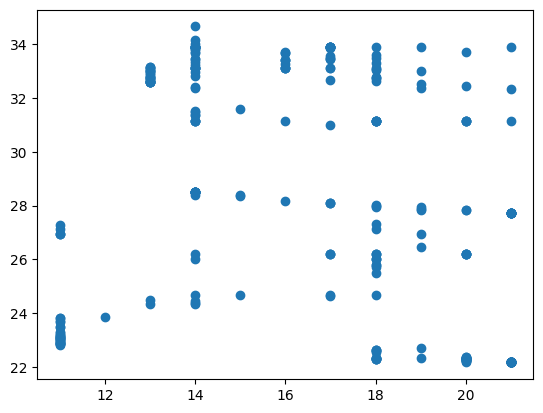

In [224]:
plt.scatter(x=data['BP'], y=data['T'])

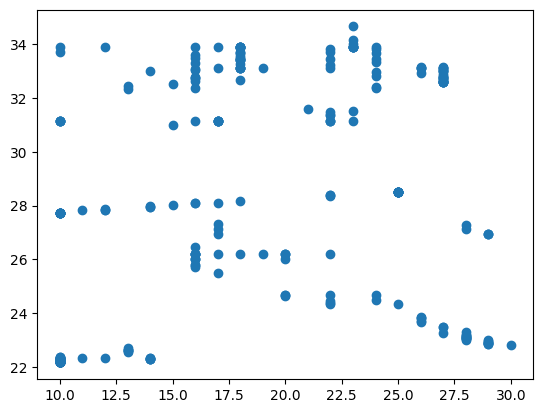

In [225]:
plt.scatter(x=data['D2H'], y=data['T'])

## Elbow mehtod

In [75]:
sse=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=5)
    kmeans.fit(data[['D2H','T']])
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

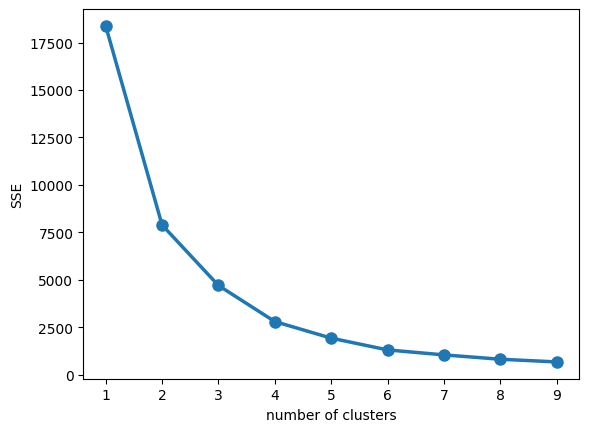

In [184]:
plt.plot(range(1,10), sse,marker='o', lw=2.5, ms=8 )
plt.xticks(range(1,10));
plt.xlabel('number of clusters')
plt.ylabel('SSE')

## Scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
sc = MinMaxScaler()

In [156]:
kmeans = KMeans(n_clusters=3,  random_state=0)

In [157]:
data['clusters']= kmeans.fit_predict(data[['D2H','T']])

In [158]:
data['clusters'].value_counts()

clusters
0    23
2    22
1    21
Name: count, dtype: int64

In [159]:
df_0 = data[data['clusters']==0]
df_1 = data[data['clusters']==1]
df_2 = data[data['clusters']==2]
# df_3 = data[data['clusters']==3]

In [165]:
kmeans.cluster_centers_[:,0]

array([0.7173913 , 0.4047619 , 0.24772727])

In [166]:
kmeans.cluster_centers_[:, 1]

array([0.7641231 , 0.26482456, 0.76874092])

Text(0, 0.5, 'Tension (cN)')

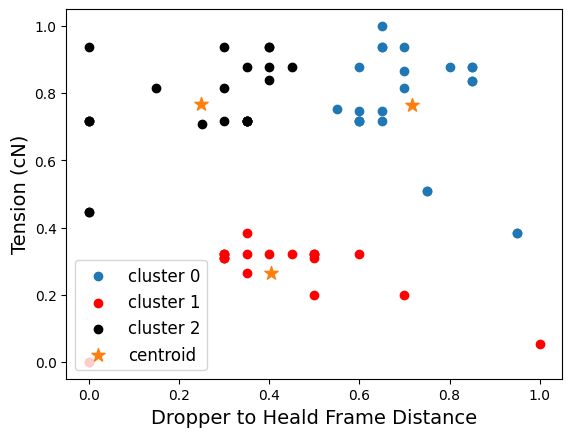

In [216]:
plt.scatter(df_0['D2H'], df_0['T'], label='cluster 0')
plt.scatter(df_1['D2H'], df_1['T'],c='r',label='cluster 1')
plt.scatter(df_2['D2H'], df_2['T'],c='k', label='cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, marker='*', label = 'centroid'  )
plt.legend(loc='lower left', fontsize=12);
plt.xlabel('Dropper to Heald Frame Distance', fontsize=14);
plt.ylabel('Tension (cN)', fontsize=14)

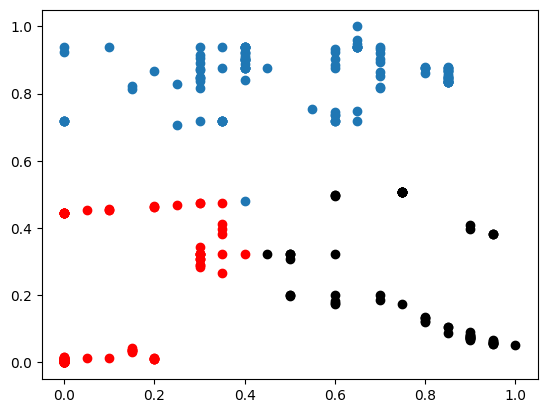

In [141]:
plt.scatter(df_0['D2H'], df_0['T'])
plt.scatter(df_1['D2H'], df_1['T'],c='r')
plt.scatter(df_2['D2H'], df_2['T'],c='k')

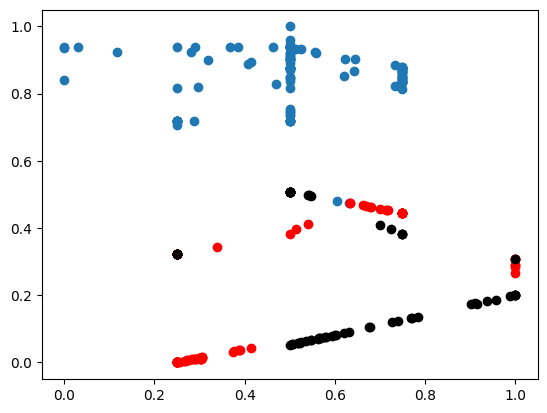

In [98]:
plt.scatter(df_0['DH'], df_0['T'])
plt.scatter(df_1['DH'], df_1['T'],c='r')
plt.scatter(df_2['DH'], df_2['T'],c='k')